<h1>California COVID-19 Post Vaccination Statewide Stats</h1>

<h5>This dataset compares vaccinated versus unvaccinated cases, deaths, and hospitalizations for the State of California. </h5>

This notebook is a continuation of exploring statstical basics and regression of the CA COVID-19 dataset. First, we will re-examine the correlational values of vaccinated cases and vaccinated hospitalizations, calculate the r<sup>2</sup> value, analyze whether the relationship appears linear, expotential, or polynomial, perform the regression analysis, make forecasting predictions, and develop visualizations. 

_Import all necessary libraries and read in the csv file._

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr
from sklearn import datasets, linear_model

In [3]:
df = pd.read_csv('CACovidStats.csv')
df

,date,area,area_type,unvaccinated_cases,vaccinated_cases,unvaccinated_hosp,vaccinated_hosp,unvaccinated_deaths,vaccinated_deaths,population_unvaccinated,population_vaccinated,unvaccinated_cases_per_100k,vaccinated_cases_per_100k,unvaccinated_hosp_per_100k,vaccinated_hosp_per_100k,unvaccinated_deaths_per_100k,vaccinated_deaths_per_100k
0,2/1/21,California,State,13818,21,794,0,12,0,32631343,338949,NaN,NaN,NaN,NaN,NaN,NaN
1,2/2/21,California,State,11359,18,631,0,15,0,32514813,373123,NaN,NaN,NaN,NaN,NaN,NaN
2,2/3/21,California,State,10335,27,565,1,17,0,32379775,409723,NaN,NaN,NaN,NaN,NaN,NaN
3,2/4/21,California,State,9013,16,501,0,19,0,32216190,431324,NaN,NaN,NaN,NaN,NaN,NaN
4,2/5/21,California,State,8404,16,512,0,27,0,32053017,447262,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,1/12/22,California,State,44075,49933,311,227,42,27,5195273,26235579,778.672129,182.065736,7.836794,1.083588,0.896419,0.072421
346,1/13/22,California,State,40341,45697,239,164,52,21,5165170,26254991,754.462790,173.837968,7.202086,0.962538,0.923770,0.073455
347,1/14/22,California,State,35374,42792,235,174,45,10,5154220,26262114,725.666126,166.253073,6.552190,0.893737,0.934047,0.071804
348,1/15/22,California,State,19110,23305,146,95,51,16,5152524,26262924,708.382366,161.051592,5.908339,0.796887,0.942673,0.070713


<h3>Regression Analysis<h3>

_Here, we see the entire csv file has been parsed as a pandas dataframe. Since we are only going to run further computations and regression analysis on two columns (vaccinated cases and vaccinated hospitalizations), let's isolate these columns and create two new pandas series with these columns._

In [4]:
vac_cases = df[['date','vaccinated_cases']]
vac_cases.head()

,date,vaccinated_cases
0,2/1/21,21
1,2/2/21,18
2,2/3/21,27
3,2/4/21,16
4,2/5/21,16


In [5]:
vac_hosp = df[['date','vaccinated_hosp']]
vac_hosp.head()

,date,vaccinated_hosp
0,2/1/21,0
1,2/2/21,0
2,2/3/21,1
3,2/4/21,0
4,2/5/21,0


_To complete regression and to calculate the r<sup>2</sup> value we need to compute the lag-1 autocorrection to ensure our residuals are independent of our X variables. Here, our X variable is 'vaccinated cases' as our hypothesis is that vaccinated cases effect vaccinated hospitalizations (i.e. as vaccinated cases increase, vaccinated hospitalizations increase). To compute the lag-1 autocorrection:<br> vaccinated_cases (stopped just before last value) / vaccinated_cases (starting at second value) - 1._

In [7]:
vac_cases_resids = df[['date','vaccinated_cases']]
resids = np.array(vac_cases_resids['vaccinated_cases'][:-1],np.float64)/np.array\
(vac_cases_resids['vaccinated_cases'][1:],np.float64)-1
vac_cases_resids['Resids'] = np.append(resids,np.nan)
vac_cases_resids

/var/folders/z7/d2ptr6pn5s530cwrnzz5rxmc0000gp/T/ipykernel_69201/1926910363.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vac_cases_resids['Resids'] = np.append(resids,np.nan)


,date,vaccinated_cases,Resids
0,2/1/21,21,0.166667
1,2/2/21,18,-0.333333
2,2/3/21,27,0.687500
3,2/4/21,16,0.000000
4,2/5/21,16,0.454545
...,...,...,...
345,1/12/22,49933,0.092698
346,1/13/22,45697,0.067887
347,1/14/22,42792,0.836172
348,1/15/22,23305,0.507341


_We will do the same computations for vaccinated hospitalizations._

In [27]:
vac_hosp_resids = df[['date','vaccinated_hosp']]
resids = np.array(vac_hosp_resids['vaccinated_hosp'][:-1],np.float64)/np.array\
(vac_hosp_resids['vaccinated_hosp'][1:],np.float64)-1
vac_hosp_resids['Resids'] = np.append(resids,np.nan)
vac_hosp_resids['Resids'].replace([np.inf, -np.inf], np.nan, inplace=True)
vac_hosp_resids['Resids'] = vac_hosp_resids['Resids'].fillna(0)
vac_hosp_resids

/var/folders/z7/d2ptr6pn5s530cwrnzz5rxmc0000gp/T/ipykernel_69201/2611120174.py:2: RuntimeWarning: divide by zero encountered in true_divide
  resids = np.array(vac_hosp_resids['vaccinated_hosp'][:-1],np.float64)/np.array\
/var/folders/z7/d2ptr6pn5s530cwrnzz5rxmc0000gp/T/ipykernel_69201/2611120174.py:2: RuntimeWarning: invalid value encountered in true_divide
  resids = np.array(vac_hosp_resids['vaccinated_hosp'][:-1],np.float64)/np.array\
/var/folders/z7/d2ptr6pn5s530cwrnzz5rxmc0000gp/T/ipykernel_69201/2611120174.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vac_hosp_resids['Resids'] = np.append(resids,np.nan)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/core/generic.py:6619: SettingWithCopyWarning:

,date,vaccinated_hosp,Resids
0,2/1/21,0,0.000000
1,2/2/21,0,-1.000000
2,2/3/21,1,0.000000
3,2/4/21,0,0.000000
4,2/5/21,0,-1.000000
...,...,...,...
345,1/12/22,227,0.384146
346,1/13/22,164,-0.057471
347,1/14/22,174,0.831579
348,1/15/22,95,0.187500


_To continue to the regression analysis using sklearn, we first must format our x-values (vaccinated cases) to an array of one dimensional arrays as the corpus for machine learning purposes._

In [9]:
x_data = vac_cases_resids['Resids'].values[0:-1].reshape(-1,1)
x_data

array([[ 0.16666667],
       [-0.33333333],
       [ 0.6875    ],
       [ 0.        ],
       [ 0.45454545],
       [ 0.375     ],
       [-0.69230769],
       [ 0.73333333],
       [-0.34782609],
       [-0.08      ],
       [ 0.31578947],
       [ 0.72727273],
       [ 1.75      ],
       [-0.80952381],
       [-0.08695652],
       [ 0.        ],
       [-0.04166667],
       [ 0.        ],
       [ 0.71428571],
       [-0.06666667],
       [-0.63414634],
       [ 0.70833333],
       [ 0.2       ],
       [-0.2       ],
       [-0.21875   ],
       [ 1.90909091],
       [-0.21428571],
       [-0.3       ],
       [-0.42857143],
       [-0.16666667],
       [ 0.3125    ],
       [ 0.28      ],
       [ 0.31578947],
       [-0.24      ],
       [-0.43181818],
       [ 0.33333333],
       [-0.26666667],
       [ 0.09756098],
       [ 0.        ],
       [ 0.64      ],
       [-0.03846154],
       [-0.43478261],
       [-0.04166667],
       [ 0.04347826],
       [ 0.12195122],
       [ 0

In [28]:
y_data = vac_hosp_resids['Resids'][0:-1]
y_data

0      0.000000
1     -1.000000
2      0.000000
3      0.000000
4     -1.000000
         ...   
344    0.162996
345    0.384146
346   -0.057471
347    0.831579
348    0.187500
Name: Resids, Length: 349, dtype: float64

_Now let's compute r<sup>2</sup> and analyze the regression._

In [20]:
good_model = linear_model.LinearRegression()

In [30]:
good_model.fit(x_data, y_data)

LinearRegression()

In [31]:
good_model.score(x_data, y_data)

0.06437942454079393

_The .score() method is the r<sup>2</sup> value. An r<sup>2</sup> value of less than 0.9 is considered a good r<sup>2</sup> value. Here, you can see the r<sup>2</sup> value for this regression is 0.0644. An r<sup>2</sup> value this low suggests there is no appreciable linear correlation._

In [32]:
good_model.coef_

array([0.43179231])

_The coefficient of determination of 0.432 suggests that perhaps 43.2% of the variability of the vaccinated hospitalizations are dependent on vaccinated cases._

In [34]:
good_model.intercept_

0.030079094255276266

_The y-intercept was calculated to be 0.030079._

<h3>Making Predictions</h3>

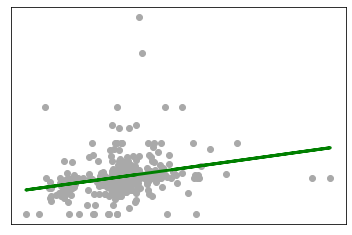

In [39]:
plt.scatter(x_data, y_data, color='darkgray')
plt.plot(x_data, good_model.predict(x_data), color='green', 
        linewidth=3)

plt.xticks(())
plt.yticks(())
plt.show()

<h2>Conclusion</h2>

This mini project explored the correlations and simple regression of the California COVID-19 Post Vaccination Statewide Stats. Comparisons were made between vaccinated and unvaccinated individuals hospitalization rates, cases, and deaths. Possible inaccuracies of this mini project includes weak correlation values between datasets/columns of the dataframe producing inaccurate regression values. The coefficient of determination of 43.2% of the variability of the vaccinated hospitalizations are dependent on vaccinated cases. The correlation between vaccinated cases and vaccinated hospitalizations produced a very small p-value of 6.720143088591805e-95 suggesting high confidence and statistical significance. 